## SCALE PREDICTION USING MACHINE LEARNING ALGORITHMS

#### 1. LOADING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,log_loss


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Loading the dataset into Jupyter notebook

In [2]:
dataset=pd.read_excel('Scale Prediction Data Main1.xlsx')

In [3]:
df=dataset.copy()
df

,Field,Well Number,Sample date,Na(ppm),Ca(ppm),Mg(ppm),SO4(ppm),HCO3(ppm),TDS(ppm),TDS(ppm).1,PH,Inspection date,Scale formation,Unnamed: 13
0,A,2,2012-02-21,29900,9460,1190.0,569,172,107091,107091.0,7.0,2013-06-02,Scale formed,NaN
1,A,2,2011-02-27,30400,11200,1380.0,786,190,114056,114056.0,6.6,2013-06-02,Scale formed,NaN
2,A,2,2010-01-03,32800,11600,1440.0,365,209,121414,121414.0,6.9,2013-06-02,Scale formed,NaN
3,A,2,2007-09-11,4446,1450,226.0,932,509,16663,16663.0,7.5,2013-06-02,Scale formed,NaN
4,A,29,2013-04-28,36600,13400,1620.0,271,239,136630,136630.0,7.2,2015-05-27,Scale formed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,B,555,2013-02-23,17600,10500,1350.0,76,756,79482,NaN,7.3,2014-08-12,Scale not formed,NaN
500,B,555,2011-02-20,21900,15100,1690.0,543,55,104288,NaN,6.1,2014-08-12,Scale not formed,NaN
501,B,555,2012-02-06,21000,12300,1450.0,379,420,93449,NaN,7.1,2014-08-12,Scale not formed,NaN
502,B,555,2009-02-15,33900,17100,2160.0,637,268,142265,NaN,6.5,2014-08-12,Scale not formed,NaN


#### 2. DATA PRE-PROCESSING

#### Statistical Description of the data

In [4]:
df.describe()

,Well Number,Na(ppm),Ca(ppm),Mg(ppm),SO4(ppm),HCO3(ppm),TDS(ppm),TDS(ppm).1,PH,Unnamed: 13
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,54.000000,504.000000,0.0
mean,362.517857,25109.121032,8988.458333,1246.758869,632.531746,330.962302,93690.575397,89316.833333,6.920040,NaN
std,141.984065,11883.379565,5258.164518,781.291146,447.072229,154.546591,44034.525981,50335.531523,0.595189,NaN
min,2.000000,51.000000,16.000000,0.770000,2.000000,26.000000,228.000000,15275.000000,0.500000,NaN
25%,258.000000,17275.000000,5180.000000,813.500000,395.750000,215.000000,62869.250000,44986.000000,6.600000,NaN
50%,390.500000,23200.000000,8075.000000,1155.000000,566.500000,313.500000,87552.000000,92932.500000,6.900000,NaN
75%,480.000000,31950.000000,11600.000000,1522.500000,731.000000,427.250000,116819.000000,134046.250000,7.200000,NaN
max,560.000000,76600.000000,34700.000000,11500.000000,4720.000000,1434.000000,235416.000000,190923.000000,8.400000,NaN


#### Dropping the null values

In [5]:
df=df.drop(['TDS(ppm).1','Unnamed: 13'],axis=1)

#### After dropping the null values

In [6]:
df

,Field,Well Number,Sample date,Na(ppm),Ca(ppm),Mg(ppm),SO4(ppm),HCO3(ppm),TDS(ppm),PH,Inspection date,Scale formation
0,A,2,2012-02-21,29900,9460,1190.0,569,172,107091,7.0,2013-06-02,Scale formed
1,A,2,2011-02-27,30400,11200,1380.0,786,190,114056,6.6,2013-06-02,Scale formed
2,A,2,2010-01-03,32800,11600,1440.0,365,209,121414,6.9,2013-06-02,Scale formed
3,A,2,2007-09-11,4446,1450,226.0,932,509,16663,7.5,2013-06-02,Scale formed
4,A,29,2013-04-28,36600,13400,1620.0,271,239,136630,7.2,2015-05-27,Scale formed
...,...,...,...,...,...,...,...,...,...,...,...,...
499,B,555,2013-02-23,17600,10500,1350.0,76,756,79482,7.3,2014-08-12,Scale not formed
500,B,555,2011-02-20,21900,15100,1690.0,543,55,104288,6.1,2014-08-12,Scale not formed
501,B,555,2012-02-06,21000,12300,1450.0,379,420,93449,7.1,2014-08-12,Scale not formed
502,B,555,2009-02-15,33900,17100,2160.0,637,268,142265,6.5,2014-08-12,Scale not formed


#### Statistical Description of the data after removing the null values

In [7]:
df.describe()

,Well Number,Na(ppm),Ca(ppm),Mg(ppm),SO4(ppm),HCO3(ppm),TDS(ppm),PH
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,362.517857,25109.121032,8988.458333,1246.758869,632.531746,330.962302,93690.575397,6.920040
std,141.984065,11883.379565,5258.164518,781.291146,447.072229,154.546591,44034.525981,0.595189
min,2.000000,51.000000,16.000000,0.770000,2.000000,26.000000,228.000000,0.500000
25%,258.000000,17275.000000,5180.000000,813.500000,395.750000,215.000000,62869.250000,6.600000
50%,390.500000,23200.000000,8075.000000,1155.000000,566.500000,313.500000,87552.000000,6.900000
75%,480.000000,31950.000000,11600.000000,1522.500000,731.000000,427.250000,116819.000000,7.200000
max,560.000000,76600.000000,34700.000000,11500.000000,4720.000000,1434.000000,235416.000000,8.400000


#### Assigning 1 and 0 to Scale formed and no scale formed respectively

In [8]:
for x in df.index:
    if df.loc[x,'Scale formation'] =='Scale formed':
        df.loc[x,'Scale formation']=1
    else:
        df.loc[x,'Scale formation']=0

#### Shuffling the data

In [9]:
df=df.sample(frac=1)
df

,Field,Well Number,Sample date,Na(ppm),Ca(ppm),Mg(ppm),SO4(ppm),HCO3(ppm),TDS(ppm),PH,Inspection date,Scale formation
3,A,2,2007-09-11,4446,1450,226.0,932,509,16663,7.5,2013-06-02,1
369,B,389,2010-04-27,50200,16000,1610.0,522,107,178439,6.6,2014-11-23,0
497,B,543,2008-03-18,592,81,23.5,189,153,1936,7.9,2014-08-19,0
51,A,250,2011-11-22,30500,9070,1200.0,244,317,107631,6.9,2016-08-28,1
146,A,450,2010-03-10,27300,7900,1020.0,468,473,95661,7.3,2013-06-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...
211,A,523,2011-02-20,13200,3700,469.0,862,580,46111,7.9,2013-07-16,1
107,A,391,2010-04-07,26000,6790,1160.0,461,253,89664,7.3,2016-12-24,1
330,B,311,2006-03-11,19100,5530,1170.0,995,428,68823,7.1,2014-03-11,1
148,A,450,2006-01-08,44000,16200,2030.0,524,89,164843,6.1,2013-06-25,1


In [10]:
df.describe()

,Well Number,Na(ppm),Ca(ppm),Mg(ppm),SO4(ppm),HCO3(ppm),TDS(ppm),PH
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,362.517857,25109.121032,8988.458333,1246.758869,632.531746,330.962302,93690.575397,6.920040
std,141.984065,11883.379565,5258.164518,781.291146,447.072229,154.546591,44034.525981,0.595189
min,2.000000,51.000000,16.000000,0.770000,2.000000,26.000000,228.000000,0.500000
25%,258.000000,17275.000000,5180.000000,813.500000,395.750000,215.000000,62869.250000,6.600000
50%,390.500000,23200.000000,8075.000000,1155.000000,566.500000,313.500000,87552.000000,6.900000
75%,480.000000,31950.000000,11600.000000,1522.500000,731.000000,427.250000,116819.000000,7.200000
max,560.000000,76600.000000,34700.000000,11500.000000,4720.000000,1434.000000,235416.000000,8.400000


#### Checking the shape

In [11]:
df.shape

(504, 12)

#### checking if there are outliers

<ipython-input-12-13a99fd654e9>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,1)


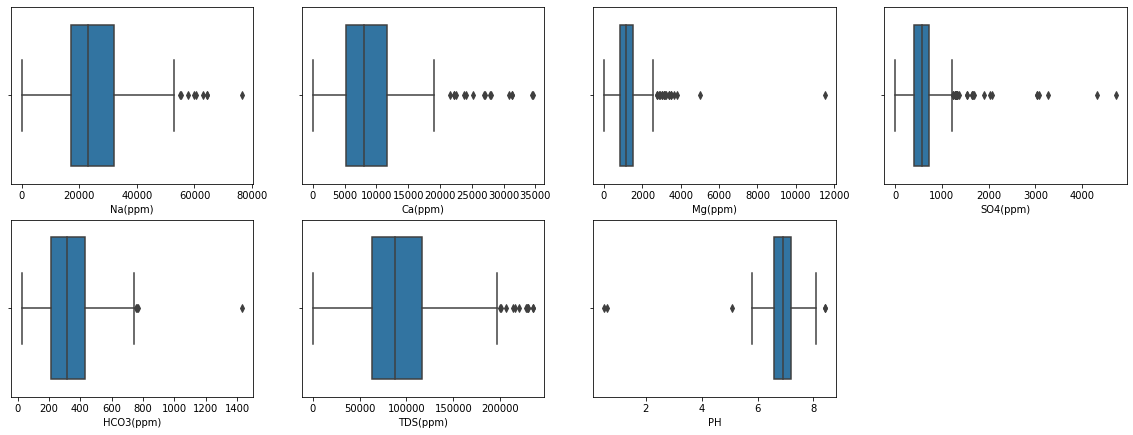

In [12]:
figure=plt.subplots(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x=df['Na(ppm)'],data=df)

plt.subplot(4,4,2)
sns.boxplot(x=df['Ca(ppm)'],data=df)

plt.subplot(4,4,3)
sns.boxplot(x=df['Mg(ppm)'],data=df)

plt.subplot(4,4,4)
sns.boxplot(x=df['SO4(ppm)'],data=df)

plt.subplot(4,4,5)
sns.boxplot(x=df['HCO3(ppm)'],data=df)

plt.subplot(4,4,6)
sns.boxplot(x=df['TDS(ppm)'],data=df)

plt.subplot(4,4,7)
sns.boxplot(x=df['PH'],data=df)

plt.show()

#### Removing the outliers

In [13]:
df['Na(ppm)']=df['Na(ppm)'].clip(lower=df['Na(ppm)'].quantile(0.05),upper=df['Na(ppm)'].quantile(0.95))
df['Ca(ppm)']=df['Ca(ppm)'].clip(lower=df['Ca(ppm)'].quantile(0.05),upper=df['Ca(ppm)'].quantile(0.95))
df['Mg(ppm)']=df['Mg(ppm)'].clip(lower=df['Mg(ppm)'].quantile(0.05),upper=df['Mg(ppm)'].quantile(0.95))
df['SO4(ppm)']=df['SO4(ppm)'].clip(lower=df['SO4(ppm)'].quantile(0.05),upper=df['SO4(ppm)'].quantile(0.95))
df['HCO3(ppm)']=df['HCO3(ppm)'].clip(lower=df['HCO3(ppm)'].quantile(0.05),upper=df['HCO3(ppm)'].quantile(0.95))
df['TDS(ppm)']=df['TDS(ppm)'].clip(lower=df['TDS(ppm)'].quantile(0.05),upper=df['TDS(ppm)'].quantile(0.95))
df['PH']=df['PH'].clip(lower=df['PH'].quantile(0.05),upper=df['PH'].quantile(0.95))

<ipython-input-14-e919daa83f64>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,1)


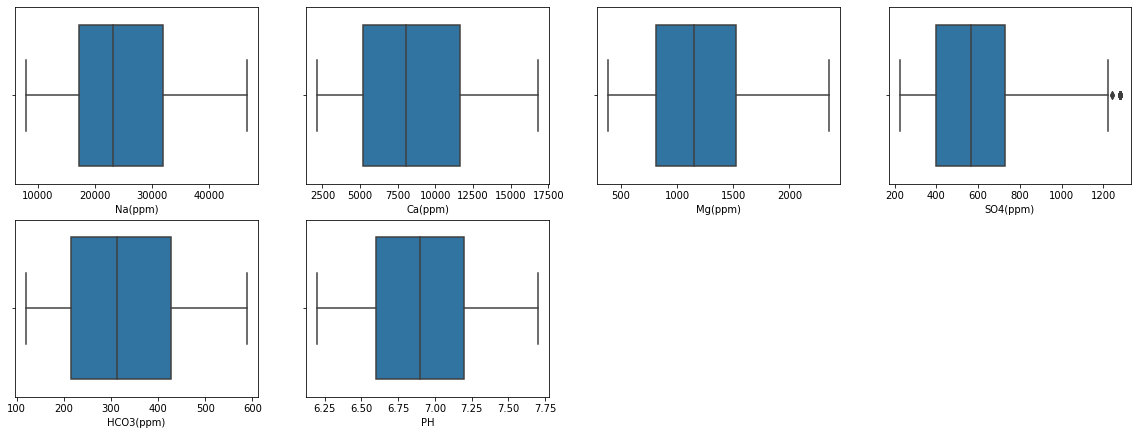

In [14]:
figure=plt.subplots(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x=df['Na(ppm)'],data=df)

plt.subplot(4,4,2)
sns.boxplot(x=df['Ca(ppm)'],data=df)

plt.subplot(4,4,3)
sns.boxplot(x=df['Mg(ppm)'],data=df)

plt.subplot(4,4,4)
sns.boxplot(x=df['SO4(ppm)'],data=df)

plt.subplot(4,4,5)
sns.boxplot(x=df['HCO3(ppm)'],data=df)


plt.subplot(4,4,6)
sns.boxplot(x=df['PH'],data=df)

plt.show()

#### 3.DATA VISUALISATION

<AxesSubplot: xlabel='Scale formation', ylabel='count'>

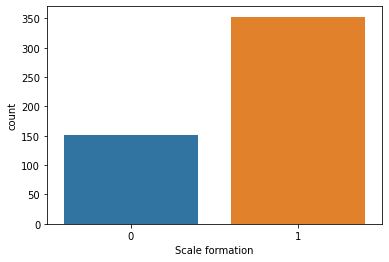

In [15]:
sns.countplot(x=df['Scale formation'],data=df)

In [16]:
dg=df.drop(['Well Number'],axis=1)

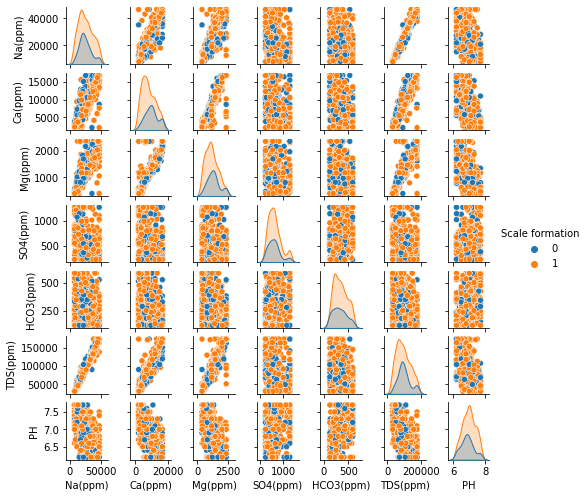

In [17]:
sns.pairplot(dg, hue ='Scale formation',height=1)
plt.show()

#### 4.SPLITTING INTO INPUT AND OUTPUT VARIABLES

In [18]:
x=df.drop(['Field','Well Number','Sample date','Inspection date','Scale formation'],axis=1)
y=df['Scale formation']

#### 5.SPLITTING INTO TRAINING AND TESTING DATA SET

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
xtrain

,Na(ppm),Ca(ppm),Mg(ppm),SO4(ppm),HCO3(ppm),TDS(ppm),PH
443,30000.0,9040,1490.0,428.0,419.0,107477.0,6.8
480,18200.0,10400,1390.0,350.0,156.0,80696.0,6.5
32,29300.0,8660,1160.0,315.0,188.0,103223.0,7.3
285,31200.0,11200,1420.0,569.0,555.0,116344.0,7.1
156,22800.0,8040,1080.0,349.0,300.0,84669.0,7.5
...,...,...,...,...,...,...,...
259,27200.0,14300,1900.0,421.0,336.0,116457.0,6.8
288,12900.0,3840,631.0,834.0,528.0,46333.0,7.2
17,42700.0,11800,1730.0,682.0,218.0,148230.0,6.6
158,36700.0,10300,1340.0,223.3,350.0,127309.0,7.0


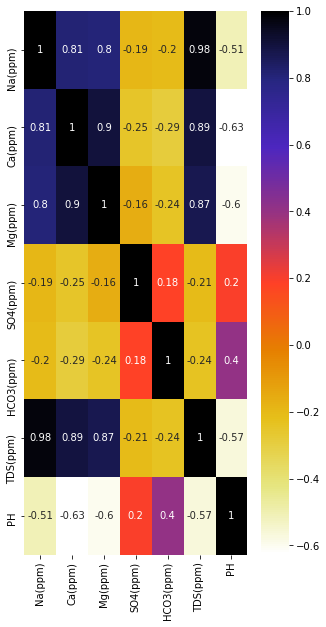

In [21]:
plt.figure(figsize=(5,10))
corr=xtrain.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

#### 6.STANDARDIZATION

In [22]:
Scaler=StandardScaler()
xtrain=Scaler.fit_transform(xtrain)

xtest=Scaler.transform(xtest)

In [23]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((403, 7), (101, 7), (403,), (101,))

In [24]:
ytrain=np.array(ytrain)
ytrain=ytrain.reshape(-1,1)
ytrain.shape

(403, 1)

In [25]:
from sklearn.preprocessing import LabelEncoder
label_data = LabelEncoder()
y_train = label_data.fit_transform(ytrain)
y_test=label_data.fit_transform(ytest)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
y_train.shape,y_test.shape

((403,), (101,))

#### 7. BUILDING THE MODEL WITH DIFFERENT ML ALGORITHMS

#### I. LOGISTIC REGRESSION

In [27]:
lr=LogisticRegression(C=10,tol=0.000001,solver='liblinear',penalty='l2',max_iter= 100)
lr.fit(xtrain,y_train)

LogisticRegression(C=10, solver='liblinear', tol=1e-06)

In [28]:
lr.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 1e-06,
 'verbose': 0,
 'warm_start': False}

In [29]:
predictions=lr.predict(xtest)
predt=lr.predict(xtrain)

In [30]:
print(f'The Accuracy for the testing set is : ',lr.score(xtest,y_test))
print(f'The Accuracy for the training set is : ',lr.score(xtrain,y_train))

The Accuracy for the testing set is :  0.6732673267326733
The Accuracy for the training set is :  0.7766749379652605


In [31]:
accuracy=accuracy_score(y_test,predictions.round())
precision=precision_score(y_test,predictions.round(),average='weighted')
recall=recall_score(y_test,predictions.round(),average='weighted')
f1score=f1_score(y_test,predictions.round(),average='weighted')

print('Accuracy:%.2f%%' %(accuracy*100.0))
print('Precision:%.2f%%' %(precision*100.0))
print('Recall:%.2f%%' %(recall*100.0))
print('F1-score:%.2f%%' %(f1score*100.0))

Accuracy:67.33%
Precision:63.24%
Recall:67.33%
F1-score:61.89%


In [32]:
print(predictions[21:26].round())

[1 1 1 1 1]


In [33]:
cm_lr=confusion_matrix(y_test,predictions)
cm_lr

array([[ 6, 27],
       [ 6, 62]], dtype=int64)

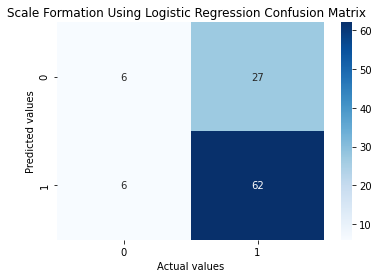

In [34]:
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Blues')   
plt.title("Scale Formation Using Logistic Regression Confusion Matrix  ")
 
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

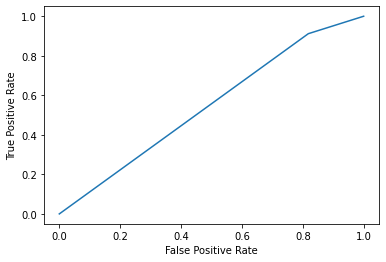

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
#xtest.insert(loc=1, column="Predicted values_lr", value=predictions)
#blind

In [37]:
log_loss(y_test,predictions,eps=1e-10)

7.523297806543026

#### II. DECISION TREE

In [38]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=100,ccp_alpha=0.0,
                           max_features=None,splitter='best', 
                          random_state=42
                           )
dt.fit(xtrain,y_train)     

DecisionTreeClassifier(max_depth=100, random_state=42)

In [39]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [40]:
predictions_dt=dt.predict(xtest)
predt_dt=dt.predict(xtrain)

In [41]:
print(f'The Accuracy for the testing set is : ',dt.score(xtest,y_test))
print(f'The Accuracy for the training set is : ',dt.score(xtrain,y_train))

The Accuracy for the testing set is :  0.6534653465346535
The Accuracy for the training set is :  1.0


In [42]:
accuracy=accuracy_score(y_test,predictions_dt.round())
precision=precision_score(y_test,predictions_dt.round(),average='weighted')
recall=recall_score(y_test,predictions_dt.round(),average='weighted')
f1score=f1_score(y_test,predictions_dt.round(),average='weighted')

print('Accuracy:%.2f%%' %(accuracy*100.0))
print('Precision:%.2f%%' %(precision*100.0))
print('Recall:%.2f%%' %(recall*100.0))
print('F1-score:%.2f%%' %(f1score*100.0))

Accuracy:65.35%
Precision:63.56%
Recall:65.35%
F1-score:64.14%


In [43]:
print(predictions_dt[85:90].round())

[1 0 1 1 0]


In [44]:
cm_dt=confusion_matrix(y_test,predictions_dt)
cm_dt

array([[12, 21],
       [14, 54]], dtype=int64)

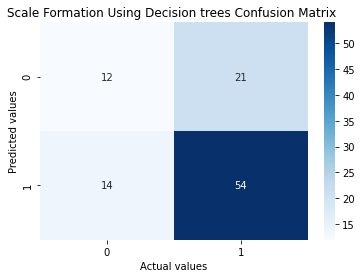

In [45]:
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')   #cmap=ListedColormap(['green', 'yellow', 'red'])
plt.title("Scale Formation Using Decision trees Confusion Matrix ")
 
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

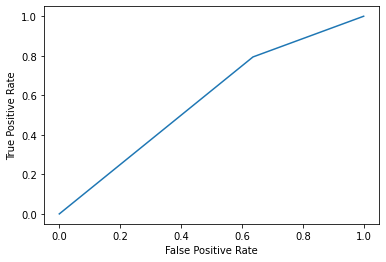

In [46]:
fpr, tpr, _ = metrics.roc_curve(y_test, predictions_dt)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
log_loss(y_test,predictions_dt,eps=1e-15)

11.969049162058495

#### III. RANDOM FOREST

In [48]:
model=RandomForestClassifier(criterion='gini',max_depth=100,
                             n_estimators=10,ccp_alpha= 0.01,random_state=30)
model.fit(xtrain,y_train)
y_pred_rf=model.predict(xtest)
ypred=model.predict(xtrain)


In [49]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [50]:
print(f'The Accuracy for the testing set is : ',model.score(xtest,y_test))
print(f'The Accuracy for the training set is : ',model.score(xtrain,y_train))

The Accuracy for the testing set is :  0.7029702970297029
The Accuracy for the training set is :  0.826302729528536


In [51]:
accuracy=accuracy_score(y_test,y_pred_rf.round())
precision=precision_score(y_test,y_pred_rf.round(),average='weighted')
recall=recall_score(y_test,y_pred_rf.round(),average='weighted')
f1score=f1_score(y_test,y_pred_rf.round(),average='weighted')

print('Accuracy:%.2f%%' %(accuracy*100.0))
print('Precision:%.2f%%' %(precision*100.0))
print('Recall:%.2f%%' %(recall*100.0))
print('F1-score:%.2f%%' %(f1score*100.0))

Accuracy:70.30%
Precision:68.14%
Recall:70.30%
F1-score:66.46%


In [52]:
print(y_pred_rf[85:90].round())

[1 1 1 1 1]


In [53]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[ 9, 24],
       [ 6, 62]], dtype=int64)

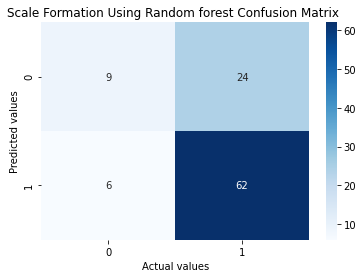

In [54]:
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Blues')   #cmap=ListedColormap(['green', 'yellow', 'red'])
plt.title("Scale Formation Using Random forest Confusion Matrix ")
 
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [55]:
log_loss(y_test,y_pred_rf,eps=1e-15)

10.259232496887575

#### IV. ARTIFICIAL NEURAL NETWORK

In [56]:
model=keras.Sequential(
[keras.layers.Dense(units=128,input_dim=xtrain.shape[1],activation='relu',name='input_layer'),
 keras.layers.BatchNormalization(),
 
 
keras.layers.Dense(units=64,activation='relu',name='layer2'),
 keras.layers.BatchNormalization(),
 
keras.layers.Dense(units=16,activation='relu',name='layer3'),
 keras.layers.BatchNormalization(),
 
 
keras.layers.Dense(units=8,activation='relu',name='layer4'),
 keras.layers.BatchNormalization(),
 
keras.layers.Dense(units=4,activation='relu',name='layer5'),
 keras.layers.BatchNormalization(),
 
keras.layers.Dense(units=1,activation='sigmoid',name='output_layer')]      
)

In [57]:
# COMPILING THE MODEL
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 128)               1024      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
layer3 (Dense)               (None, 16)                1040      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
layer4 (Dense)               (None, 8)                 1

In [59]:
# TRAINING THE MODEL
history=model.fit(xtrain,y_train,validation_split=0.2,epochs=250,batch_size=128,verbose=1)

Epoch 1/250
3/3 [==============================] - 9s 362ms/step - loss: 0.8375 - accuracy: 0.5280 - val_loss: 0.6670 - val_accuracy: 0.7531
Epoch 2/250
3/3 [==============================] - 0s 24ms/step - loss: 0.7259 - accuracy: 0.6149 - val_loss: 0.6674 - val_accuracy: 0.7654
Epoch 3/250
3/3 [==============================] - 0s 23ms/step - loss: 0.6562 - accuracy: 0.6584 - val_loss: 0.6676 - val_accuracy: 0.7654
Epoch 4/250
3/3 [==============================] - 0s 23ms/step - loss: 0.6312 - accuracy: 0.6832 - val_loss: 0.6667 - val_accuracy: 0.7654
Epoch 5/250
3/3 [==============================] - 0s 23ms/step - loss: 0.5775 - accuracy: 0.7360 - val_loss: 0.6664 - val_accuracy: 0.7778
Epoch 6/250
3/3 [==============================] - 0s 24ms/step - loss: 0.5472 - accuracy: 0.7702 - val_loss: 0.6675 - val_accuracy: 0.7654
Epoch 7/250
3/3 [==============================] - 0s 23ms/step - loss: 0.5267 - accuracy: 0.7826 - val_loss: 0.6689 - val_accuracy: 0.7284
Epoch 8/250
3/3 [==

3/3 [==============================] - 0s 23ms/step - loss: 0.2060 - accuracy: 0.9534 - val_loss: 0.7730 - val_accuracy: 0.4938
Epoch 60/250
3/3 [==============================] - 0s 23ms/step - loss: 0.2115 - accuracy: 0.9565 - val_loss: 0.7741 - val_accuracy: 0.4938
Epoch 61/250
3/3 [==============================] - 0s 23ms/step - loss: 0.1942 - accuracy: 0.9627 - val_loss: 0.7758 - val_accuracy: 0.4815
Epoch 62/250
3/3 [==============================] - 0s 25ms/step - loss: 0.1876 - accuracy: 0.9627 - val_loss: 0.7724 - val_accuracy: 0.4815
Epoch 63/250
3/3 [==============================] - 0s 23ms/step - loss: 0.1888 - accuracy: 0.9534 - val_loss: 0.7782 - val_accuracy: 0.4938
Epoch 64/250
3/3 [==============================] - 0s 23ms/step - loss: 0.2000 - accuracy: 0.9596 - val_loss: 0.7859 - val_accuracy: 0.4815
Epoch 65/250
3/3 [==============================] - 0s 24ms/step - loss: 0.1985 - accuracy: 0.9534 - val_loss: 0.7841 - val_accuracy: 0.4815
Epoch 66/250
3/3 [========

Epoch 117/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0572 - accuracy: 0.9969 - val_loss: 0.6306 - val_accuracy: 0.7407
Epoch 118/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 0.6224 - val_accuracy: 0.7284
Epoch 119/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0544 - accuracy: 0.9938 - val_loss: 0.6187 - val_accuracy: 0.7160
Epoch 120/250
3/3 [==============================] - 0s 31ms/step - loss: 0.0606 - accuracy: 0.9938 - val_loss: 0.6189 - val_accuracy: 0.7407
Epoch 121/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0625 - accuracy: 0.9938 - val_loss: 0.6264 - val_accuracy: 0.7407
Epoch 122/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0572 - accuracy: 0.9938 - val_loss: 0.6358 - val_accuracy: 0.7284
Epoch 123/250
3/3 [==============================] - 0s 22ms/step - loss: 0.0526 - accuracy: 0.9969 - val_loss: 0.6430 - val_accuracy: 0.7531
Epoch 

Epoch 175/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0510 - accuracy: 0.9907 - val_loss: 0.8458 - val_accuracy: 0.7160
Epoch 176/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0383 - accuracy: 0.9907 - val_loss: 0.8283 - val_accuracy: 0.7284
Epoch 177/250
3/3 [==============================] - 0s 24ms/step - loss: 0.0405 - accuracy: 0.9938 - val_loss: 0.7641 - val_accuracy: 0.7407
Epoch 178/250
3/3 [==============================] - 0s 25ms/step - loss: 0.0576 - accuracy: 0.9876 - val_loss: 0.7084 - val_accuracy: 0.7778
Epoch 179/250
3/3 [==============================] - 0s 23ms/step - loss: 0.0394 - accuracy: 0.9938 - val_loss: 0.6912 - val_accuracy: 0.7901
Epoch 180/250
3/3 [==============================] - 0s 27ms/step - loss: 0.0598 - accuracy: 0.9876 - val_loss: 0.7202 - val_accuracy: 0.7531
Epoch 181/250
3/3 [==============================] - 0s 26ms/step - loss: 0.0314 - accuracy: 0.9969 - val_loss: 0.7628 - val_accuracy: 0.7531
Epoch 

Epoch 233/250
3/3 [==============================] - 0s 30ms/step - loss: 0.0497 - accuracy: 0.9876 - val_loss: 0.9449 - val_accuracy: 0.7531
Epoch 234/250
3/3 [==============================] - 0s 31ms/step - loss: 0.0431 - accuracy: 0.9907 - val_loss: 0.9784 - val_accuracy: 0.7531
Epoch 235/250
3/3 [==============================] - 0s 34ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.9203 - val_accuracy: 0.7654
Epoch 236/250
3/3 [==============================] - 0s 33ms/step - loss: 0.0575 - accuracy: 0.9876 - val_loss: 0.8881 - val_accuracy: 0.7778
Epoch 237/250
3/3 [==============================] - 0s 33ms/step - loss: 0.0407 - accuracy: 0.9907 - val_loss: 0.8875 - val_accuracy: 0.7654
Epoch 238/250
3/3 [==============================] - 0s 28ms/step - loss: 0.0818 - accuracy: 0.9752 - val_loss: 0.8344 - val_accuracy: 0.7654
Epoch 239/250
3/3 [==============================] - 0s 31ms/step - loss: 0.0481 - accuracy: 0.9876 - val_loss: 0.7689 - val_accuracy: 0.7531
Epoch 

In [60]:
#STEP 13: EVALUATING THE DATA
loss,accuracy=model.evaluate(xtrain,y_train)
print('loss= ',loss)
print('accuracy= ',accuracy)

13/13 [==============================] - 0s 4ms/step - loss: 0.1943 - accuracy: 0.9479
loss=  0.19427819550037384
accuracy=  0.9478908181190491


In [61]:
#STEP 13: EVALUATING THE DATA
loss,accuracy=model.evaluate(xtest,y_test)
print('loss= ',loss)
print('accuracy= ',accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 1.6056 - accuracy: 0.6139
loss=  1.6055513620376587
accuracy=  0.6138613820075989


In [62]:
prediction=model.predict(xtest)

In [63]:
print(prediction[85:90].round())

[[1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [64]:
ytest.iloc[85:90]

371    0
309    1
227    1
187    1
469    0
Name: Scale formation, dtype: object

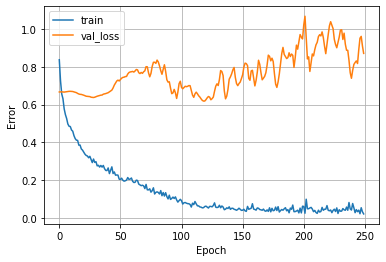

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

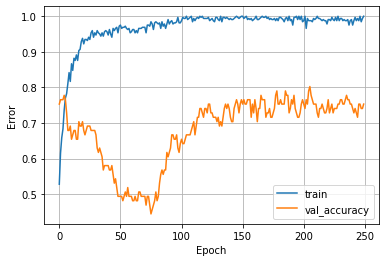

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [67]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
accuracy=accuracy_score(y_test,prediction.round())
precision=precision_score(y_test,prediction.round(),average='weighted')
recall=recall_score(y_test,prediction.round(),average='weighted')
f1score=f1_score(y_test,prediction.round(),average='weighted')

print('Accuracy:%.2f%%' %(accuracy*100.0))
print('Precision:%.2f%%' %(precision*100.0))
print('Recall:%.2f%%' %(recall*100.0))
print('F1-score:%.2f%%' %(f1score*100.0))

Accuracy:61.39%
Precision:62.30%
Recall:61.39%
F1-score:61.79%


In [68]:
cm_ann=confusion_matrix(y_test,prediction.round())
cm_ann

array([[15, 18],
       [21, 47]], dtype=int64)

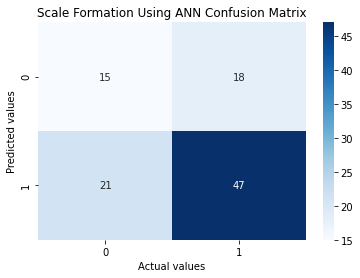

In [69]:
sns.heatmap(cm_ann,annot=True,fmt='d',cmap='Blues')   #cmap=ListedColormap(['green', 'yellow', 'red'])
plt.title("Scale Formation Using ANN Confusion Matrix")
 
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

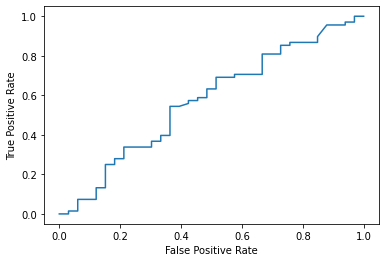

In [70]:
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

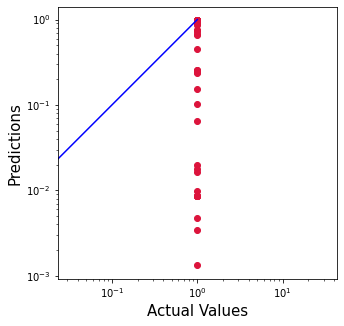

In [71]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [72]:
data={'Well No':[21,15,20,50,100,1,85,5,6,10],'Actual Values':[1,1,1,1,0,1,1,1,0,1],
     'Predicted_LR':[1,1,1,1,0,1,1,1,1,1],'Predicted_DT':[0,0,1,1,0,1,0,1,0,0],
      'Predicted_RF':[1,1,1,1,0,1,1,1,0,1],
     'Predicted_ANN':[1,1,1,1,0,1,1,1,0,1]}
dh=pd.DataFrame(data)
dh

,Well No,Actual Values,Predicted_LR,Predicted_DT,Predicted_RF,Predicted_ANN
0,21,1,1,0,1,1
1,15,1,1,0,1,1
2,20,1,1,1,1,1
3,50,1,1,1,1,1
4,100,0,0,0,0,0
5,1,1,1,1,1,1
6,85,1,1,0,1,1
7,5,1,1,1,1,1
8,6,0,1,0,0,0
9,10,1,1,0,1,1


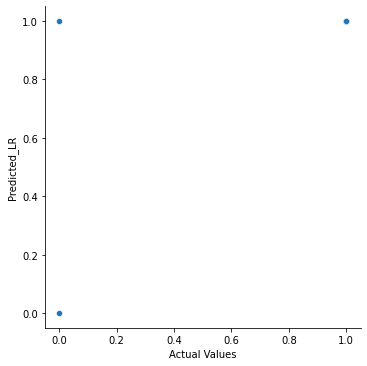

In [73]:
sns.relplot(data=dh,x='Actual Values',y='Predicted_LR')

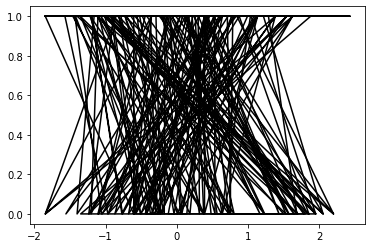

In [74]:
#plt.scatter(xtrain,y_train,color='g')
plt.plot(xtest,predictions,color='k')
plt.show()

In [75]:
from sklearn.metrics import log_loss

In [76]:
log_loss(y_test,prediction,eps=1e-15)

1.605507874149036

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_test,prediction)

0.571969696969697

In [79]:
from sklearn.feature_selection import mutual_info_classif

In [80]:
mutual_info=mutual_info_classif(xtrain,y_train)

In [1]:
#mutual_info=pd.Series(mutual_info)
#mutual_info.index=xtrain1.columns
#mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,5))

In [ ]:
xtrain1=pd.DataFrame(xtrain,columns =['Na(ppm)','Ca(ppm)','Mg(ppm)','SO4(ppm)','HCO3(ppm)','TDS(ppm)','PH'])

In [ ]:
list1=['HCO3(ppm)','TDS(ppm)','Mg(ppm)','Na(ppm)','Ca(ppm)','PH','SO4(ppm)']
list2=[0.056552,0.054872,0.048904,0.043567,0.031529,0.022654,0.012046]
dh=pd.DataFrame()
dh['list1']=list1
dh['list2']=list2

In [ ]:
dh

In [ ]:
list3=['FEATURES','IMPORTANCE']
dh.columns=list3

In [ ]:
dh